In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from numpy import linalg
# rcParams['figure.figsize'] = 5, 4

In [3]:
from sklearn import svm

In [4]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
%matplotlib inline

In [6]:
# iris = datasets.load_iris()
# x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
# print("target_names: "+str(iris['target_names']))
# y = pd.DataFrame(iris['target'], columns=['target'])
# iris_data = pd.concat([x,y], axis=1)
# iris_data = iris_data[['sepal length (cm)','petal length (cm)','target']]
# iris_data = iris_data[iris_data['target'].isin([0,1])]
# iris_data.head(3)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# y_train.head()

DT = ['Topic_163',
 'listed',
 'Topic_124',
 'Topic_3',
 'enlish_tweets',
 'Topic_32',
 'Topic_95']

In [9]:
RF = ['Topic_173',
 'Topic_116',
 'Topic_124',
 'Topic_107',
 'Topic_139',
 'Topic_163',
 'age',
 'Topic_11',
 'Topic_105',
 'Topic_29',
 'Topic_180',
 'Topic_196',
 'Topic_66',
 'Topic_49',
 'foll_friend_ratio',
 'Topic_76',
 'listed',
 'Topic_160',
 'gender:female_gt_0_5',
 'Topic_95']

In [10]:
ds_demo = pd.read_csv("twitter_income.csv")
ds_demo.head(5)

,user_id,age,gender:female_gt_0_5,anxious:agree,anxious:strongly_agree,anxious:disagree,anxious:strongly_disagree,anxious:neither,children:no,children:yes,...,Topic_191,Topic_192,Topic_193,Topic_194,Topic_195,Topic_196,Topic_197,Topic_198,Topic_199,Topic_200
0,1103,30.700773,-0.050586,0.113558,0.034757,0.329889,0.221230,0.300567,0.682671,0.317329,...,0.143927,0.001070,0.001070,0.006956,0.042804,0.036918,0.019797,0.000000,0.093098,0.010166
1,8273,29.817867,0.376868,0.079798,0.030549,0.360824,0.285467,0.243363,0.693130,0.306870,...,0.164856,0.000000,0.001863,0.004967,0.053710,0.009624,0.005278,0.000621,0.066749,0.007762
2,9269,31.260406,0.204542,0.079508,0.026907,0.343969,0.273264,0.276351,0.835034,0.164966,...,0.136182,0.000000,0.001230,0.005841,0.014448,0.071011,0.004919,0.010452,0.043345,0.008300
3,10571,33.120257,0.164126,0.093635,0.037560,0.410242,0.185529,0.273034,0.837154,0.162846,...,0.128398,0.000000,0.002313,0.018508,0.020821,0.024870,0.010989,0.002313,0.074610,0.015616
4,11758,26.284088,-0.066739,0.103949,0.038573,0.239573,0.237358,0.380548,0.741889,0.258111,...,0.085206,0.000468,0.001404,0.004682,0.010768,0.020599,0.004682,0.001404,0.042603,0.015918


In [10]:
df_RF = ds_demo[RF]
df_RF.head()

,Topic_173,Topic_116,Topic_124,Topic_107,Topic_139,Topic_163,age,Topic_11,Topic_105,Topic_29,Topic_180,Topic_196,Topic_66,Topic_49,foll_friend_ratio,Topic_76,listed,Topic_160,gender:female_gt_0_5,Topic_95
0,0.004815,0.025147,0.031033,0.026752,0.023007,0.026752,30.700773,0.010166,0.008026,0.008561,0.018727,0.036918,0.004815,0.004280,4.115183,0.044409,119.0,0.004280,-0.050586,0.025682
1,0.006520,0.012729,0.005899,0.005899,0.007451,0.012108,29.817867,0.004967,0.005278,0.025147,0.002484,0.009624,0.017696,0.006520,4.754741,0.012729,218.0,0.005588,0.376868,0.008072
2,0.000307,0.014448,0.025208,0.004304,0.009530,0.031356,31.260406,0.007993,0.001230,0.015063,0.007685,0.071011,0.002459,0.002767,9.134267,0.018445,534.0,0.007685,0.204542,0.013833
3,0.004627,0.009254,0.006940,0.008097,0.038751,0.020243,33.120257,0.009254,0.005205,0.020821,0.012146,0.024870,0.012146,0.008097,1.259508,0.015616,6.0,0.005784,0.164126,0.006940
4,0.007491,0.022004,0.009831,0.009363,0.007959,0.007959,26.284088,0.003745,0.006086,0.011704,0.007022,0.020599,0.007491,0.002341,0.996403,0.013109,11.0,0.006554,-0.066739,0.005618


In [11]:
Y = pd.cut(ds_demo.loc[:,"mean_income"], bins = 10, labels = list(range(0,10)))
Y.head()

0    3
1    3
2    3
3    0
4    2
Name: mean_income, dtype: category
Categories (10, int64): [0 < 1 < 2 < 3 ... 6 < 7 < 8 < 9]

In [12]:
Y = ds_demo.loc[:,"mean_income"]
Y;

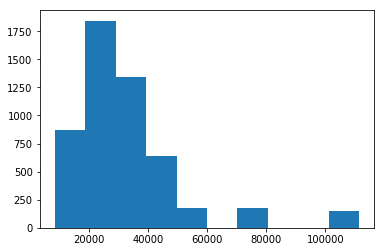

In [14]:
plt.hist(Y);

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    df_RF, Y, test_size=0.2, random_state=999)

In [32]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [33]:
from sklearn.svm import SVC
from sklearn.svm import SVR

In [34]:
svm = SVC(kernel='rbf')

In [35]:
svm.fit(X_train_std,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [36]:
svm.predict(X_test_std)

array([ 10793, 111413,  23460, ...,  26313,  27713,  28959])

In [37]:
len(y_test)

1039

In [19]:
error = 0
for i, v in enumerate(svm.predict(X_test_std)):
    if v!= y_test[i]:
        error+=1
print(error)

549


In [20]:
acc = error / len(y_test)
acc

0.5283926852743022

In [21]:
# svm.predict_proba(X_test_std)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    df_RF, Y, test_size=0.2, random_state=999)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
# your code here
param_grid ={"kernel": ["rbf"],
             "C": 10**np.linspace(-1,10,20),
             "gamma": 10**np.linspace(-1,10,20),
             "max_iter" : [100], 
             "coef0" : [10**np.linspace(-3,3,20)]}

# param_grid ={"kernel": ["rbf"],
#              'C': 10**np.linspace(-5,10,20)}

rr = svm.SVC()
gr = GridSearchCV( rr, param_grid=param_grid)
rs = gr.fit(X_train,y_train)
print(rs.best_params_)

TypeError: only length-1 arrays can be converted to Python scalars

In [ ]:
from sklearn.model_selection import train_test_split

for i in range(990,1000):
    X_train, X_test, Y_train, Y_test = train_test_split(df_RF, Y, test_size=0.2, random_state=i)

    clf = svm.SVC(kernel='rbf', C=16237.767391887242, gamma = "") 
    clf.fit(X_train, Y_train)
    print(clf.score(X_test, Y_test))
    correct=1.0*(clf.predict(X_test) == np.asarray(Y_test)).sum()/len(Y_test)
    
    print ( "Out of sample, we successfully predict {} percent of the data".format((correct)*100))

In [ ]:

scores = cross_val_score(dt, df_RF, Y, cv = 10)

In [ ]:
np.mean(scores)